In [5]:
import numpy as np
import matplotlib.pyplot as plt

4.Integration numérique

Méthode des rectangles

a)Choisissons une fonction mathématique, par exemple la fonction inverse:

In [6]:
def f(x):
    return 1/x

b) Définissons une fonction qui retourne l'intégrale de f via la méthode des rectangles, en comparant le résultat avec la fonction inverse et la valeur "vraie":

In [7]:
def rectangle(f, a, b, N):
    d= (b-a)/N
    x= np.linspace(a, b, N)
    S=0
    for i in range(N):
        S+=f(x[i])*d
    return S
print(rectangle(f, 1, 2, 5000))
print(np.log(2))


0.6931585536243341
0.6931471805599453


c)Modifions la fonction précédente pour que celle-ci prenne un paramètre optionnel `alpha` déterminant le choix du paramètre $\alpha\in[0,1]$.

In [11]:
def rectangle(f, a, b, N, alpha=0):
    d= (b-a)/N
    x= np.linspace(a, b, N)
    S=0
    for i in range(N):
        S+=f(x[i]+alpha*d)*d
    return S
print(rectangle(f, 1, 2, 5000, 0.5))
print(np.log(2))

0.6931085548738358
0.6931471805599453


d) Écrivons une fonction `plot_rectangles(f,a,b,N,alpha=0.5)` qui représente graphiquement l'approximation par la méthode des rectangles.

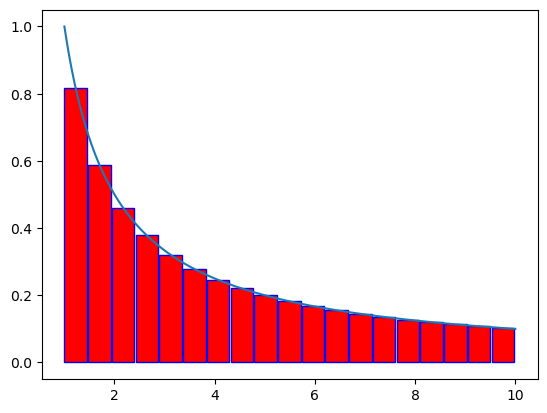

In [37]:
import matplotlib.patches as patches
def plot_rectangle(f, a, b, N, alpha):
    d=(b-a)/N
    x=np.linspace(a, b, N)
    u=np.linspace(a, b, 100*N)
    S=f(u)
    fig, ax = plt.subplots()
    for i in range(N-1):
        ax.add_patch(patches.Rectangle((x[i], 0), d, f(x[i]+alpha*d), edgecolor="blue", facecolor="red", fill=True))
    plt.plot(u, S)
    return None
plot_rectangle(f, 1, 10, 20, 0.5)

e) Maintenant, on va déterminer empiriquement la vitesse de convergence de la méthode des rectangles en fonction de $N$.

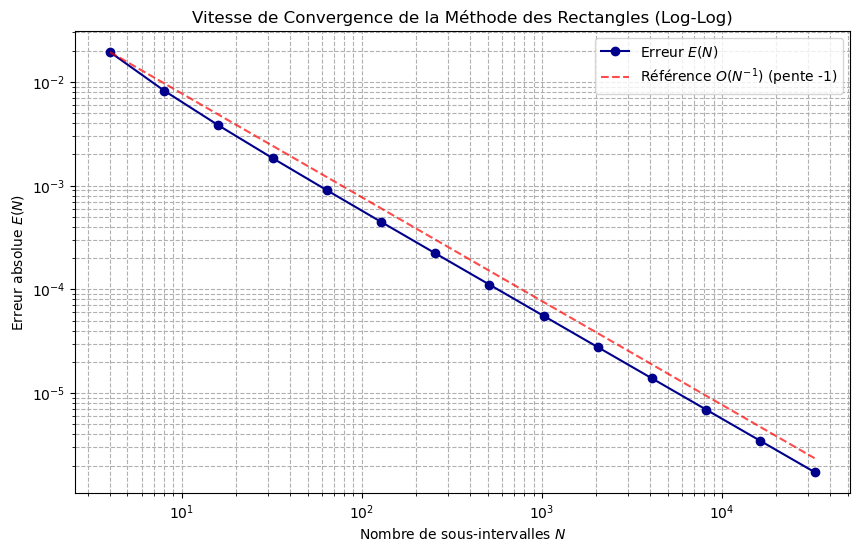


--- Analyse Empirique ---
L'ordre de convergence théorique est p = 1.
La pente empirique (p) calculée sur les dernières valeurs est : 1.0002


In [14]:
N_vals = [2**n for n in range(2, 16)]
erreurs = []

for N in N_vals:
    approx = rectangle(f, 1, 2, N)
    
    erreur = np.abs(approx - np.log(2))
    erreurs.append(erreur)

N_array = np.array(N_vals)
Erreur_array = np.array(erreurs)
log_N = np.log(N_array)
log_Erreur = np.log(Erreur_array)

pente, _ = np.polyfit(log_N[-5:], log_Erreur[-5:], 1)
ordre_p = -pente


plt.figure(figsize=(10, 6))
plt.loglog(N_array, Erreur_array, 'o-', label='Erreur $E(N)$', color='darkblue')


ref_line = Erreur_array[0] * (N_array / N_array[0])**(-1)
plt.loglog(N_array, ref_line, 'r--', label='Référence $O(N^{-1})$ (pente -1)', alpha=0.7)

plt.title("Vitesse de Convergence de la Méthode des Rectangles (Log-Log)")
plt.xlabel("Nombre de sous-intervalles $N$")
plt.ylabel("Erreur absolue $E(N)$")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

print("\n--- Analyse Empirique ---")
print(f"L'ordre de convergence théorique est p = 1.")
print(f"La pente empirique (p) calculée sur les dernières valeurs est : {ordre_p:.4f}")

Exercice 5.2: Méthode des trapèzes

a)Écrivons une fonction Python `trapezes(f,a,b,N)` qui retourne l'approximation de l'intégrale $J$ par la méthode des trapèzes. Tester la fonction `trapezes(f,a,b,N)` pour différentes fonctions $f$.

In [31]:
def trapèze(f, a, b, N):
    d=(b-a)/N
    x= np.linspace(a, b, N+1)
    S=0
    for i in range(N):
        S+=(f(x[i])+f(x[i+1]))*d/2
    return S
print(trapèze(f, 1, 3, 500))
print(np.log(3))
print(trapèze(np.cos, 1, 5, 700))
print(np.sin(5)-np.sin(1))

1.0986134738511877
1.0986122886681098
-1.800390360433648
-1.8003952594710348


b) L'implémentation de la fonction `trapezes(f,a,b,N)` n'est pas optimale quant au nombre d'évaluations de $f$ effectuées par rapport au nombre d'évaluations nécessaires. Une implémentation optimale de la fonction `trapezes(f,a,b,N)` devrait effectuer $N+1$ évaluations de $f$. En effet ici, le nombre d'évaluation de f est deux fois trop grande, car on l'évalue deux fois au même point d'une itération à l'autre. Il serai plus performant former une liste de f(x) qui évalue une fois pour toute la fonction f: dans notre cas cela correpsond à écrire ceci à la place des lignes 4 et 5 du précédent algorithme :



In [16]:
def trapèze(f, a, b, N):
    d=(b-a)/N
    x= np.linspace(a, b, N+1)
    S=0
    y = f(x)
    for i in range(N):
        S+=(y[i]+y[i+1])*d/2
    return S

c) On utilise la même méthode d'approximation de la vitesse de convergence que pour les rectangles:

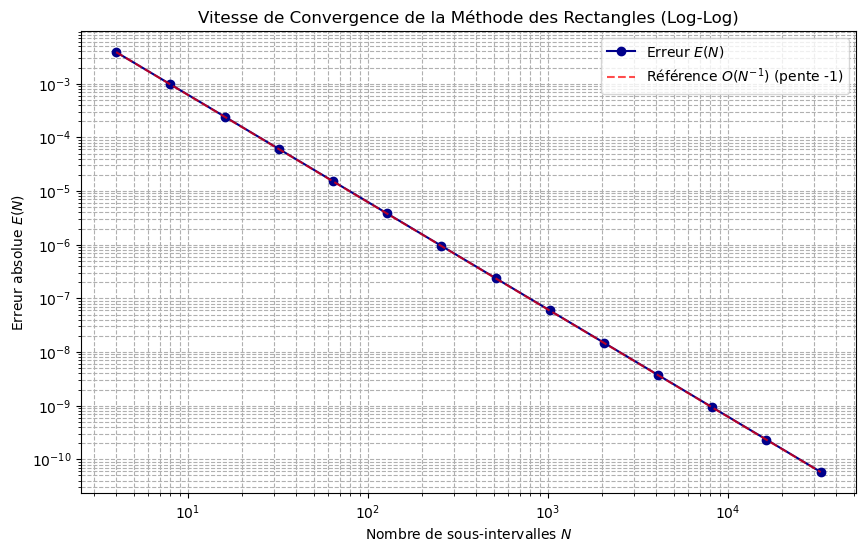


--- Analyse Empirique ---
L'ordre de convergence théorique est p = 2.
La pente empirique (p) calculée sur les dernières valeurs est : 2.0000


In [18]:
N_vals = [2**n for n in range(2, 16)]
erreurs = []

for N in N_vals:
    approx = trapèze(f, 1, 2, N)
    
    erreur = np.abs(approx - np.log(2))
    erreurs.append(erreur)

N_array = np.array(N_vals)
Erreur_array = np.array(erreurs)
log_N = np.log(N_array)
log_Erreur = np.log(Erreur_array)

pente, _ = np.polyfit(log_N[-5:], log_Erreur[-5:], 1)
ordre_p = -pente


plt.figure(figsize=(10, 6))
plt.loglog(N_array, Erreur_array, 'o-', label='Erreur $E(N)$', color='darkblue')


ref_line = Erreur_array[0] * (N_array / N_array[0])**(-2)
plt.loglog(N_array, ref_line, 'r--', label='Référence $O(N^{-1})$ (pente -1)', alpha=0.7)

plt.title("Vitesse de Convergence de la Méthode des Rectangles (Log-Log)")
plt.xlabel("Nombre de sous-intervalles $N$")
plt.ylabel("Erreur absolue $E(N)$")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

print("\n--- Analyse Empirique ---")
print(f"L'ordre de convergence théorique est p = 2.")
print(f"La pente empirique (p) calculée sur les dernières valeurs est : {ordre_p:.4f}")

d) Lemme : Soit $f$ dérivable 2 fois sur $[a_i, a_{i+1}]$, alors il existe $\theta_i \in [a_i, a_{i+1}]$ tel que :
$$
f(x) - (f(a_i) + \frac{x-a_i}{(a_{i+1}-a_i)}f(a_{i+1})) = \frac{f''(\theta_i)}{2}(x-a_i)(x-a_{i+1})
$$
(Posons pour simplifier $ P(x) =f(a_{i+1}) + \frac{x-a_i}{(a_{i+1}-a_i)}f(a_{i+1})$)

En effet, pour $x = a_i$ ou $x= a_{i+1}$, l'égalité est vraie. Sinon, posons : 
$$
C = \frac{f(x) - P(x)}{(x-a_i)(x-a_{i+1})}
$$
et 
$$
g(t) = f(t) - P(t) - C(t-a_i)(t-a_{i+1})
$$
Alors $g$ s'annule en $a_i$, $a_{i+1}$ ainsi qu'en $x$. Donc $g$ s'annule 3 fois sur $[a_i, a_{i+1}]$, donc $g'$ s'annule 2 fois sur $[a_i, a_{i+1}]$, et $g''$ s'annule une fois sur $[a_i, a_{i+1}]$ : il existe $\theta_i \in [a_i, a_{i+1}]$ tel que $g''(\theta_i) = 0$
Or, d'après la forme de $g$, $g'' = f'' -2C$, donc 
$$
\frac{f''(\theta_i)}{2} = C = \frac{f(x) - P(x)}{(x-a_i)(x-a_{i+1})}                                 
$$  
Ceci étant démontré, on considère un segment $[a_i, a_{i+1}]$, sur lequel un trapèze allant de $(a_i, f(a_i))$ à $(a_{i+1}, f(a_{i+1}))$ est donné par la fonction polynomiale 
$$
P(x) =f(a_{i+1}) + \frac{x-a_i}{(a_{i+1}-a_i)}f(a_{i+1})
$$
On a alors 
$$
|\int_{a_i}^{a_{i+1}} f(t)-P(t) dt | \le \int_{a_i}^{a_{i+1}}|f(t)-P(t)| dt \le \frac{\sup_{i\in [1, n]}|f''(\theta_i)|}{2} \int_{a_i}^{a_{i+1}} (t-a_i)(t-a_{i+1})dt = \frac{M}{2} \frac{(a_{i+1} - a_i)^3}{6}
$$
, en ayant posé $M= \sup_{i\in [1, n]}|f''(\theta_i)|$.
En sommant sur tous les segments, on trouve que la différence entre $\int_{a}^{b} f$ et la somme des trapèzes est proportionnel à $\frac{1}{N^2}$, donc la vitesse de convergence est quadratique.

La bonne hypothèse a faire sur f est qu'elle soit $C^{3}$ sur $[a, b]$, ce qui assure la continuité de $f''$ et donc l'existence d'un $\sup{f''}$ sur $[a, b]$.

Méthode de Monte-Carlo

a)
Écrivons une fonction `montecarlo(f,a,b,N)` qui détermine une approximation $\tilde{J}$ de $J$ par la méthode de Monte-Carlo. L'idée est de de générer une liste de N nombres pseudo-aléatoire entre 0 et 1, et d'étendre la distribution pour avoir des nombres entre a et b quelconques.

In [22]:
rng = np.random.default_rng()
def montecarlo(f,a,b,N):
    x = (b-a)*rng.random(N) + a
    S=0
    for i in x :
        S+=f(i)
    return S*(b-a)/N
print(montecarlo(f, 1, 2, 50))
print(np.log(2))

0.7153794032385179
0.6931471805599453


b)Je modifier la fonction précédente, pour qu'elle retourne en plus de la moyenne $\tilde{J}$ également la variance empirique:

In [23]:
def montecarlo2(f,a,b,N):
    x = (b-a)*rng.random(N) + a
    y=f(x)
    S1, S2 = 0, 0
    for i in y :
        S1+=i
    E=S1*(b-a)/N
    for i in y : 
        S2+=(i-E/(b-a))**2
    return (E, S2*(b-a)**2/N)
print(montecarlo2(f, 1, 2, 500))

(0.7001410467338495, 0.019635736643116446)


c)Puis, j'étudie empiriquement la convergence de la méthode de Monte-Carlo en fonction de $N$ en faisant pour chaque valeur de $N$ une statistique sur $k$ exécutions. Plus précisément cela consiste à faire $k$ évaluations de $\tilde{J}$ par la méthode de Monte-Carlo et de calculer la moyenne et la variance des $k$ résultats obtenus.

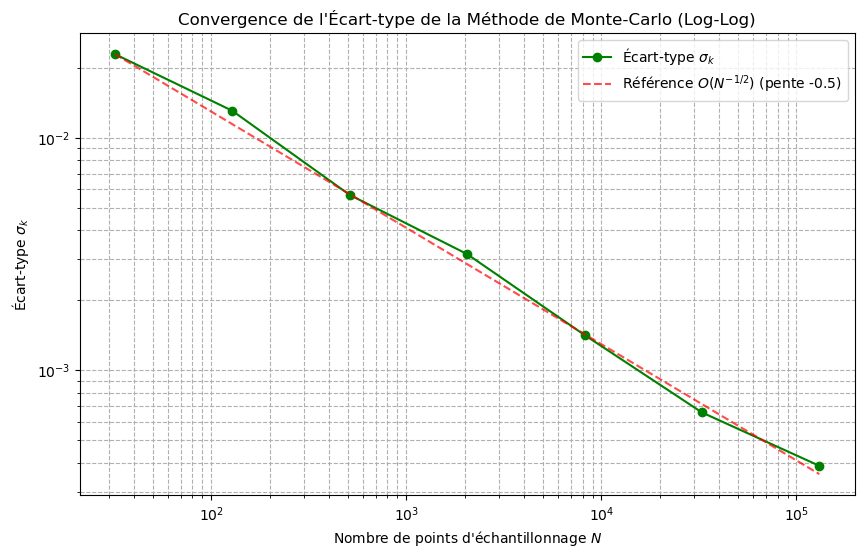


--- Analyse Empirique de la Convergence ---
Ordre de convergence théorique (p) : 0.5
Pente empirique calculée sur l'écart-type : 0.5048


In [25]:
N_vals = [2**n for n in range(5, 18, 2)]
K = 50

moyennes_mc = []
variances_mc = []
ecart_type_mc = []

for N in N_vals:
    results_k = [montecarlo(f, 1, 2, N) for _ in range(K)]
    mu_k = np.mean(results_k)
    moyennes_mc.append(mu_k)
    sigma_k = np.std(results_k)
    ecart_type_mc.append(sigma_k)
    variances_mc.append(sigma_k**2)

N_array = np.array(N_vals)
Ecart_type_array = np.array(ecart_type_mc)
Erreur_moyenne_array = np.abs(np.array(moyennes_mc) - np.log(2))

plt.figure(figsize=(10, 6))
plt.loglog(N_array, Ecart_type_array, 'o-', label='Écart-type $\sigma_k$', color='green')


ref_line = Ecart_type_array[0] * (N_array / N_array[0])**(-0.5)
plt.loglog(N_array, ref_line, 'r--', label='Référence $O(N^{-1/2})$ (pente -0.5)', alpha=0.7)

log_N = np.log(N_array)
log_sigma = np.log(Ecart_type_array)
pente, _ = np.polyfit(log_N, log_sigma, 1)
ordre_p = -pente

plt.title("Convergence de l'Écart-type de la Méthode de Monte-Carlo (Log-Log)")
plt.xlabel("Nombre de points d'échantillonnage $N$")
plt.ylabel("Écart-type $\sigma_k$")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

print("\n--- Analyse Empirique de la Convergence ---")
print(f"Ordre de convergence théorique (p) : 0.5")
print(f"Pente empirique calculée sur l'écart-type : {ordre_p:.4f}")

Exercice 5.4: Méthode de Simpson


La méthode de Simpson consiste à approximer la fonction $f$ sur chaque intervalle $[x_n,x_{n+1}]$ par un polynôme de degré deux. Le choix le plus naturel est le polynôme $p_n$ de degré deux passant par les points $(x_n,f(x_n))$, $(\frac{x_n+x_{n+1}}{2},f(\frac{x_n+x_{n+1}}{2}))$ et $(x_{n+1},f(x_{n+1}))$.

a)
Détermineons la forme explicite du polynôme $p_n$.
Si $a=x_n$, $b= \frac{x_n + x_{n+1}}{2}$ et $c = x_{n+1}$, on prend $$ P(x)= f(a)\frac{(x-b)(x-c)}{(a-b)(a-c)} + f(b)\frac{(x-a)(x-c)}{b-a)((b-c)} + f(c)\frac{(x-a)(x-b)}{(c-a)(c-b)} $$
que l'on implante avec la fonction ci-dessous : (avec $x = x_n$ et $y=x_{n+1}$, $t$ étant la variable):

b)Calculons l'approximation donnée par $J_n \approx \int_{x_n}^{x_{n+1}} p_n(x)\,\mathrm{d} x \,.$ Nous allons utiliser Simpy, pour résoudre le problème de manière formelle : 

In [28]:
import sympy as sp

x_sym, x_n, x_n_plus_1 = sp.symbols('x_sym x_n x_{n+1}')
f_a, f_b, f_c = sp.symbols('f_a f_b f_c') # Valeurs de la fonction aux points a, b, c

def get_lagrange_polynome():
    a = x_n
    c = x_n_plus_1
    b = (a + c) / 2

    L_a = (x_sym - b) * (x_sym - c) / ((a - b) * (a - c))
    terme_a = f_a * L_a
    
    L_b = (x_sym - a) * (x_sym - c) / ((b - a) * (b - c))
    terme_b = f_b * L_b
    
    L_c = (x_sym - a) * (x_sym - b) / ((c - a) * (c - b))
    terme_c = f_c * L_c
    
    P_x = terme_a + terme_b + terme_c
    
    return sp.simplify(P_x)

P_x_sym = get_lagrange_polynome()

print("--- a) Forme symbolique du polynôme P(x) (en fonction de f(a), f(b), f(c)) ---")
sp.pretty_print(P_x_sym)

--- a) Forme symbolique du polynôme P(x) (en fonction de f(a), f(b), f(c)) ---
-fₐ⋅(x_sym - x_{n+1})⋅(xₙ - 2⋅x_sym + x_{n+1}) + 4⋅f_b⋅(xₙ - x_sym)⋅(x_sym - x
──────────────────────────────────────────────────────────────────────────────
                                                                       2      
                                                         (xₙ - x_{n+1})       

_{n+1}) + f_c⋅(xₙ - x_sym)⋅(xₙ - 2⋅x_sym + x_{n+1})
───────────────────────────────────────────────────
                                                   
                                                   


In [29]:
J_n_sym = sp.integrate(P_x_sym, (x_sym, x_n, x_n_plus_1))

J_n_simplified = sp.simplify(J_n_sym)

h = (x_n_plus_1 - x_n) / 2

simpson_form = (x_n_plus_1 - x_n) / 6 * (f_a + 4 * f_b + f_c)
verification = sp.simplify(J_n_simplified - simpson_form)


print("\n--- b) Calcul de l'approximation J_n = ∫ P(x) dx ---")
print("Formule de Simpson obtenue par intégration :")
sp.pretty_print(J_n_simplified)
print("\nLa différence avec la formule classique de Simpson doit être nulle pour vérification:")
print(f"Vérification (J_n_sym - Formule de Simpson) = {verification}")


--- b) Calcul de l'approximation J_n = ∫ P(x) dx ---
Formule de Simpson obtenue par intégration :
  fₐ⋅xₙ   fₐ⋅x_{n+1}   2⋅f_b⋅xₙ   2⋅f_b⋅x_{n+1}   f_c⋅xₙ   f_c⋅x_{n+1}
- ───── + ────────── - ──────── + ───────────── - ────── + ───────────
    6         6           3             3           6           6     

La différence avec la formule classique de Simpson doit être nulle pour vérification:
Vérification (J_n_sym - Formule de Simpson) = 0


d)Écrivons une fonction `simpson(f,a,b,N)` permettant de calculer une approximation de $J$ avec la méthode de Simpson.
On utilise cette fois ci numpy :

In [30]:
import numpy as np

def simpson(f, a, b, N):
    if N % 2 != 0:
        raise ValueError("Le nombre de sous-intervalles N doit être un nombre pair pour la méthode de Simpson.")
    h = (b - a) / N
    x_i = np.linspace(a, b, N + 1)
    f_i = f(x_i)
    somme_pairs = np.sum(f_i[2:N:2])
    somme_impairs = np.sum(f_i[1:N:2])

    f_a = f_i[0]  # f(x_0)
    f_b = f_i[N]  # f(x_N)
    
    J_approx = (h / 3) * (f_a + 4 * somme_impairs + 2 * somme_pairs + f_b)
    
    return J_approx

e)Je vais comparer la précision des méthodes des rectangles, des trapèzes et de Simpson en fonction de $N$ pour une fonction lisse et la fonction $f(x)=\sqrt{1-x^2}$ sur $[0,1]$ (dont l'intégrale vaut $\frac{\pi}{4}$).

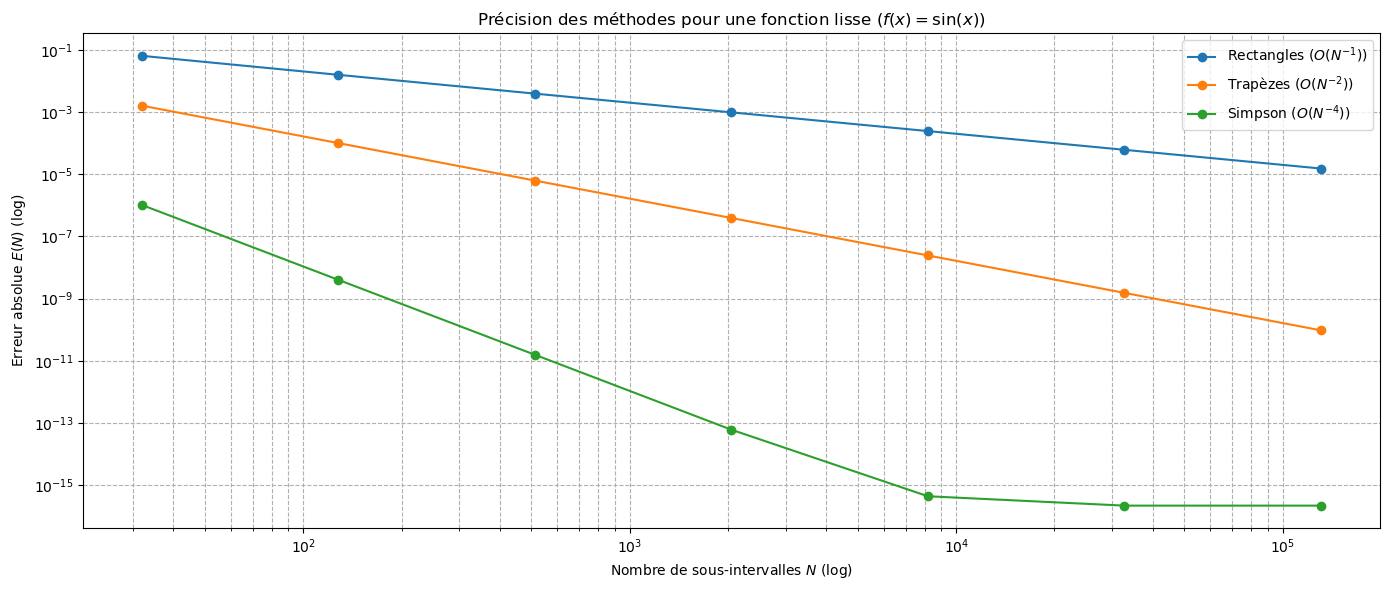

In [32]:
def f_lisse(x): return np.sin(x)

methods = {
    "Rectangles ($O(N^{-1})$)": rectangle,
    "Trapèzes ($O(N^{-2})$)": trapèze,
    "Simpson ($O(N^{-4})$)": simpson
}
plt.figure(figsize=(14, 6))

for name, method in methods.items():
    erreurs = []
    for N in N_vals:
        approx = method(f_lisse, 0.0, np.pi, N)
        erreur = np.abs(approx - 2)
        erreurs.append(erreur)
    
    plt.loglog(N_vals, erreurs, 'o-', label=name)

plt.title("Précision des méthodes pour une fonction lisse ($f(x) = \sin(x)$)")
plt.xlabel("Nombre de sous-intervalles $N$ (log)")
plt.ylabel("Erreur absolue $E(N)$ (log)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()